In [1]:
# Chosen using results from Bipolar-K
epsilon = 0.75
k = 250

input_dim = 13166
num_clusters = 18

model_file = "Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt"
pc_matrix_file = "Data/bipolar_pc.tsv"

import csv
import json
import matplotlib
import numpy as np
import os
import pandas as pd

os.system("rm *.png")

from load_vae import load_vae

import sys
sys.path.insert(0, "../Code/")
from explain_cs import explain
from metrics import metrics, eval_epsilon
from myplot import plot_polys, plot_groups, plot_metrics, plot_explanation
from misc import poly2labels

matplotlib.rc("lines", markersize = 4)# Override some default plot parameters

def load_model(input_dim = input_dim, model_file = model_file):
    return load_vae(input_dim, model_file, feature_transform = pc_matrix_file)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
# Load Data & Configuration

x = pd.read_csv("Data/bipolar_rep_scaled.tsv", sep="\t").values

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


In [3]:
# Approximate the original data

matrix = pd.read_csv(pc_matrix_file, sep = "\t", header = None).values

x_full = np.matmul(x, np.transpose(matrix))

In [4]:
# Calculate Data Representation

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x_full, D: np.zeros((1, input_dim))})




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


[[ 3.3800273   0.58802944]
 [-7.5421214   9.088422  ]
 [ 2.4342237  -3.8953023 ]
 [-9.697315   -0.10346276]
 [ 1.3877294   3.9996471 ]
 [11.841474    1.5273368 ]
 [-2.0942922   3.8801737 ]
 [-7.030844    9.332766  ]
 [-7.094506    8.529476  ]
 [-7.242572    9.173951  ]]
[[[-1.797500955324459, -0.5981320130209724], [-0.07418768236694717, 0.5844885612309412], [1.792735030003687, 1.0913259501960475], [3.831989069670076, -0.3728709512587045], [6.187183876045339, -2.4002205071191263], [6.876509185228343, -4.82177692106352], [6.129740100280088, -5.835451698993733], [3.516048302961199, -6.285973822518272], [1.103409720820686, -6.342289087958839], [-0.4762941127236999, -5.610190637231465], [-1.6251696280287078, -3.639156346811607]], [[-3.750589331342969, -7.074387538686214], [-2.774045143333712, -12.142761428337273], [-3.951642546521345, -13.43801253347032], [-5.41645882853523, -13.494327798910888], [-7.053606437844863, -13.26906673714862], [-8.432257056210872, -12.255391959218407], [-8.259925

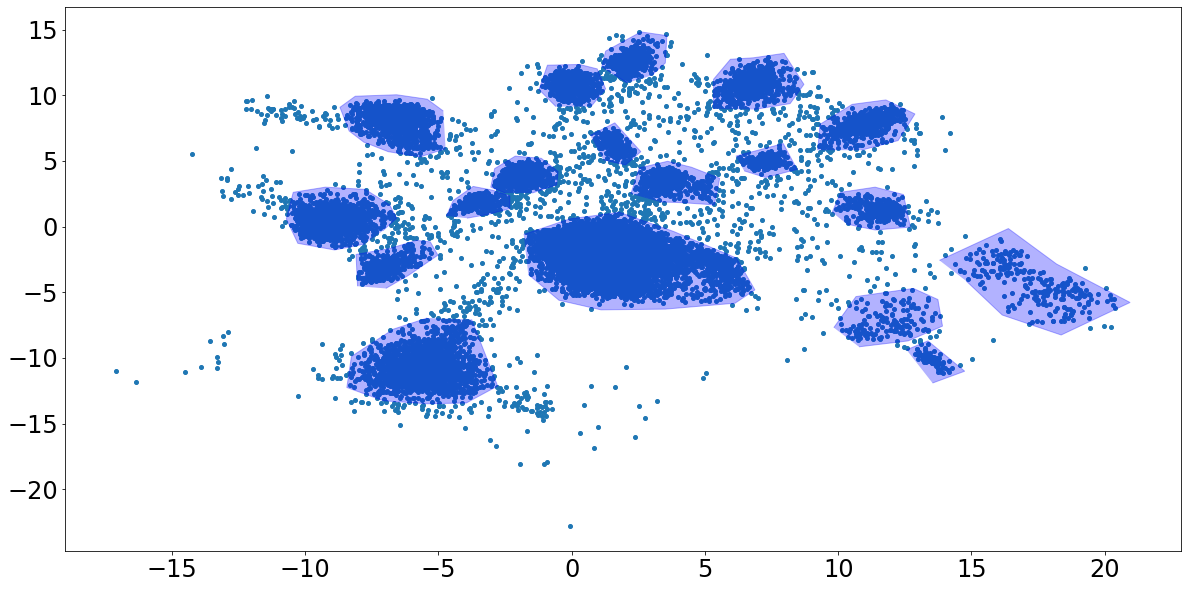

In [5]:
print(data_rep[0:10])
print(all_vertices)
# Visualize the data and the marked clusters
plot_polys(data_rep, all_vertices)

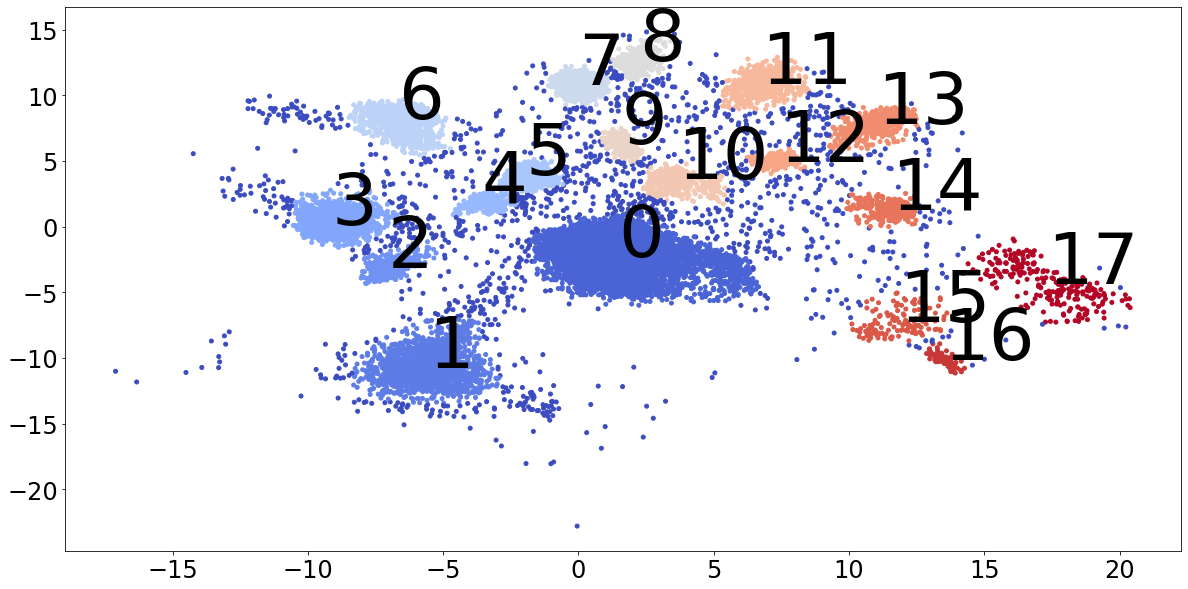

In [6]:
# Visualize the clusters in the learned representation

labels = poly2labels(data_rep, all_vertices)

means, centers, indices = plot_groups(x_full, data_rep, num_clusters, labels, name = "bipolar-rep.png")


INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


../Code/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)
/Users/abhijith/opt/miniconda3/envs/fact/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


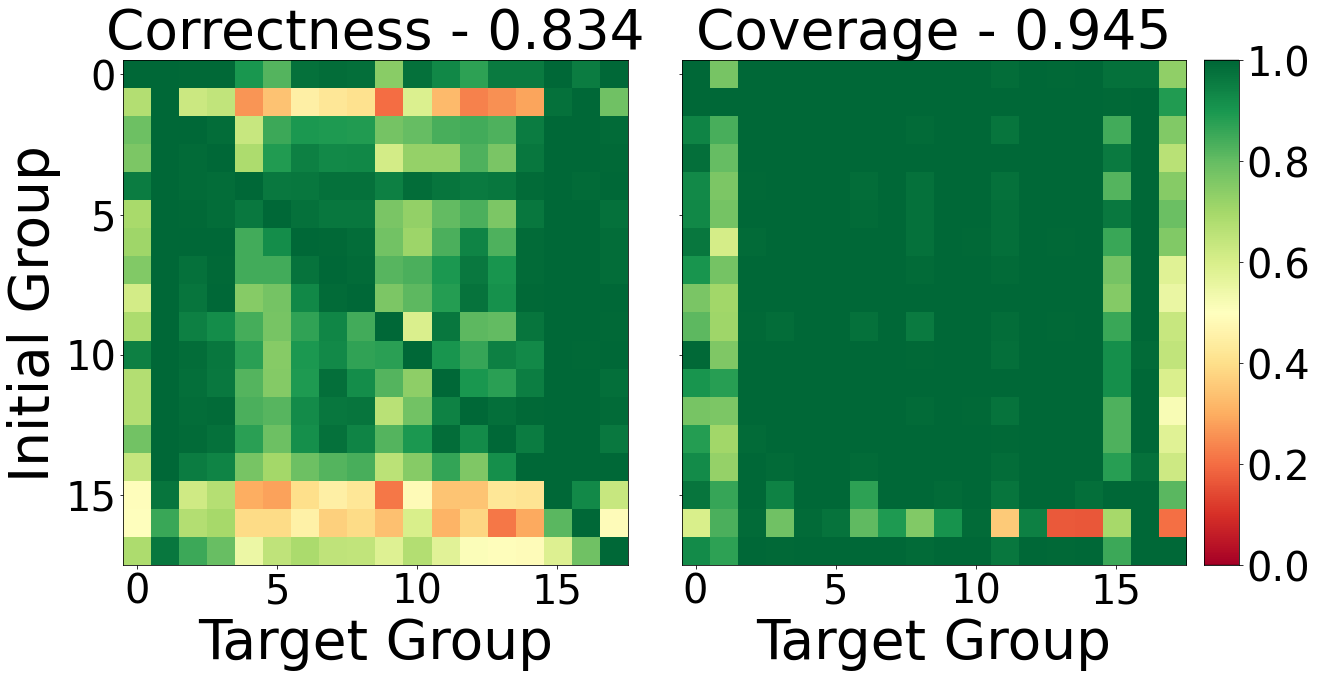

INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


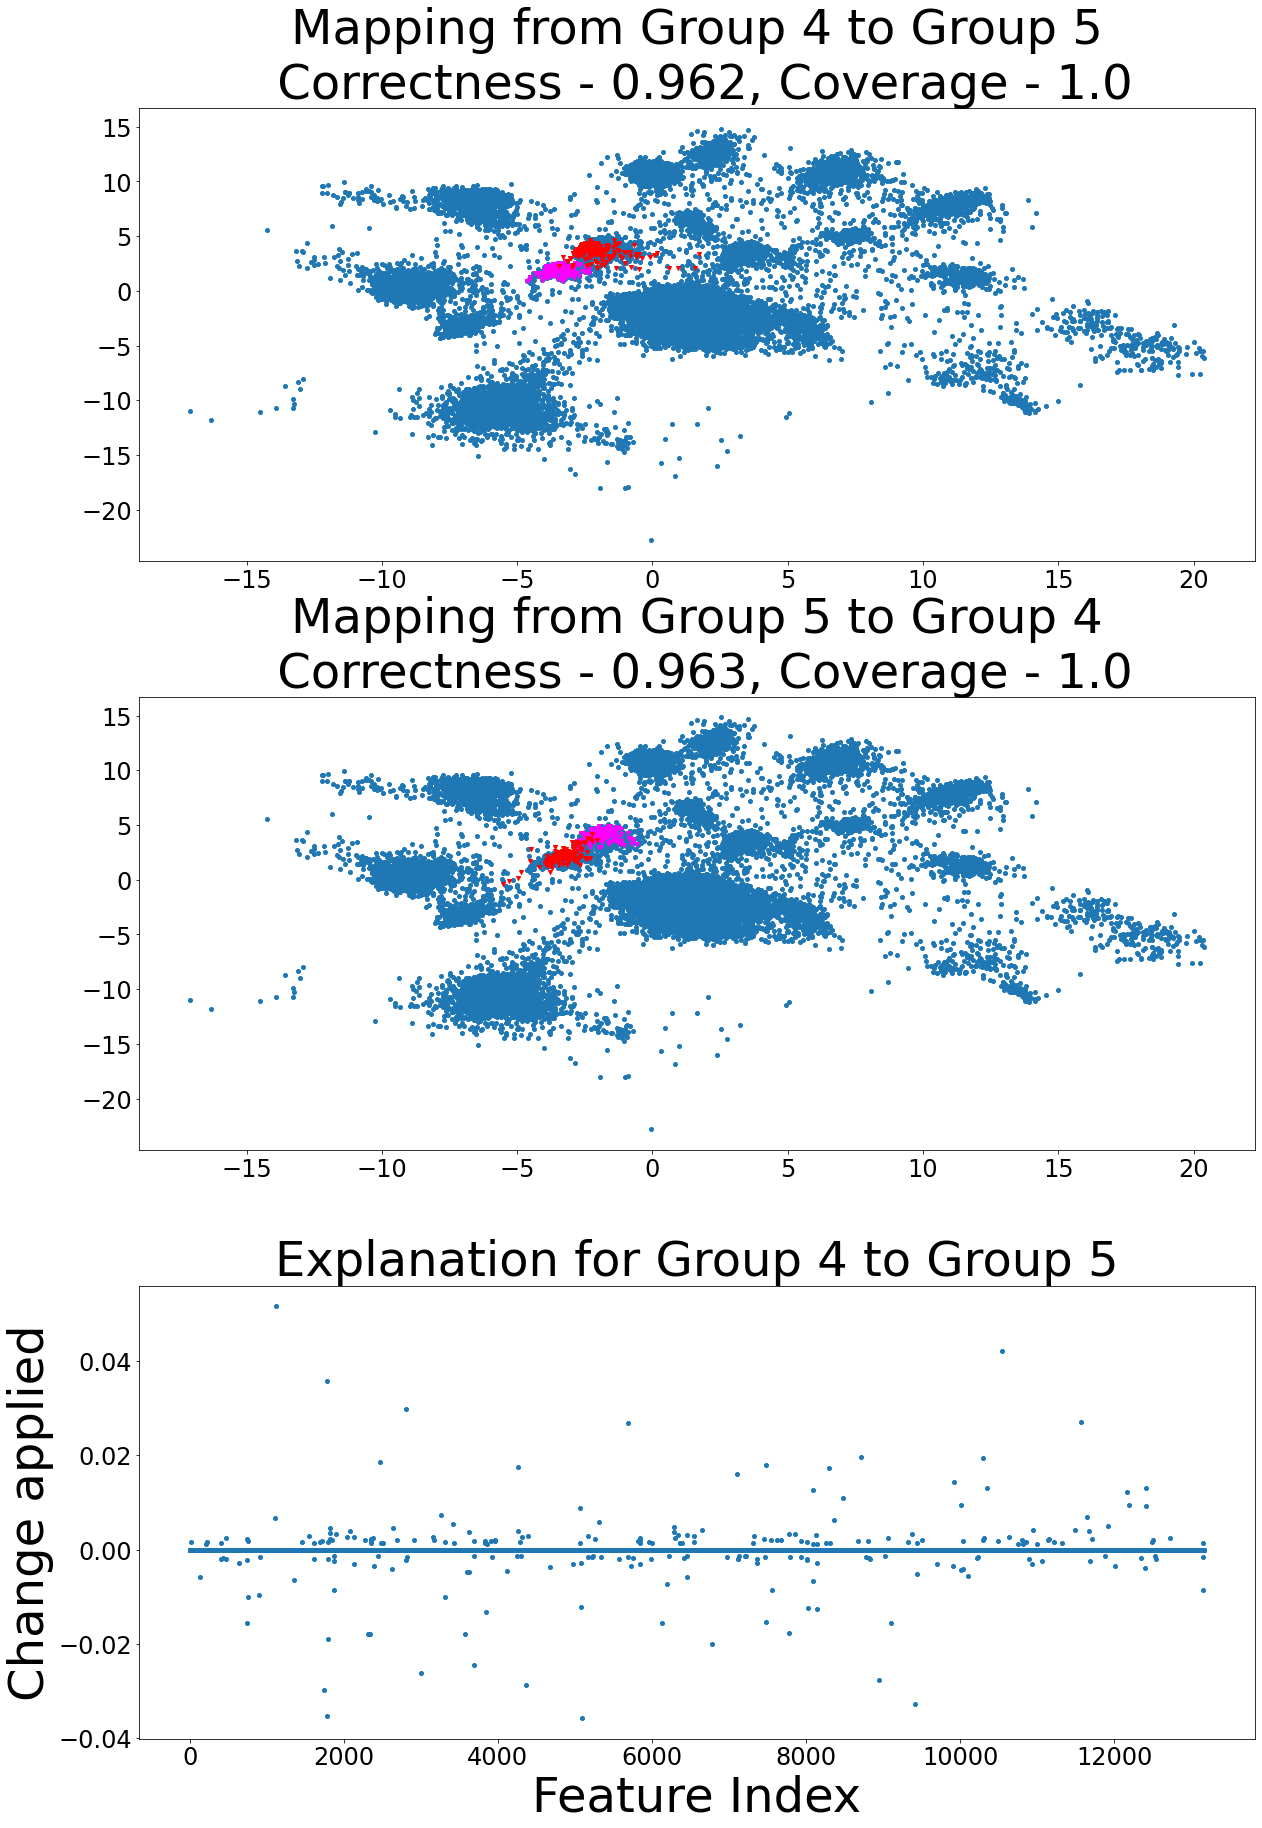

INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


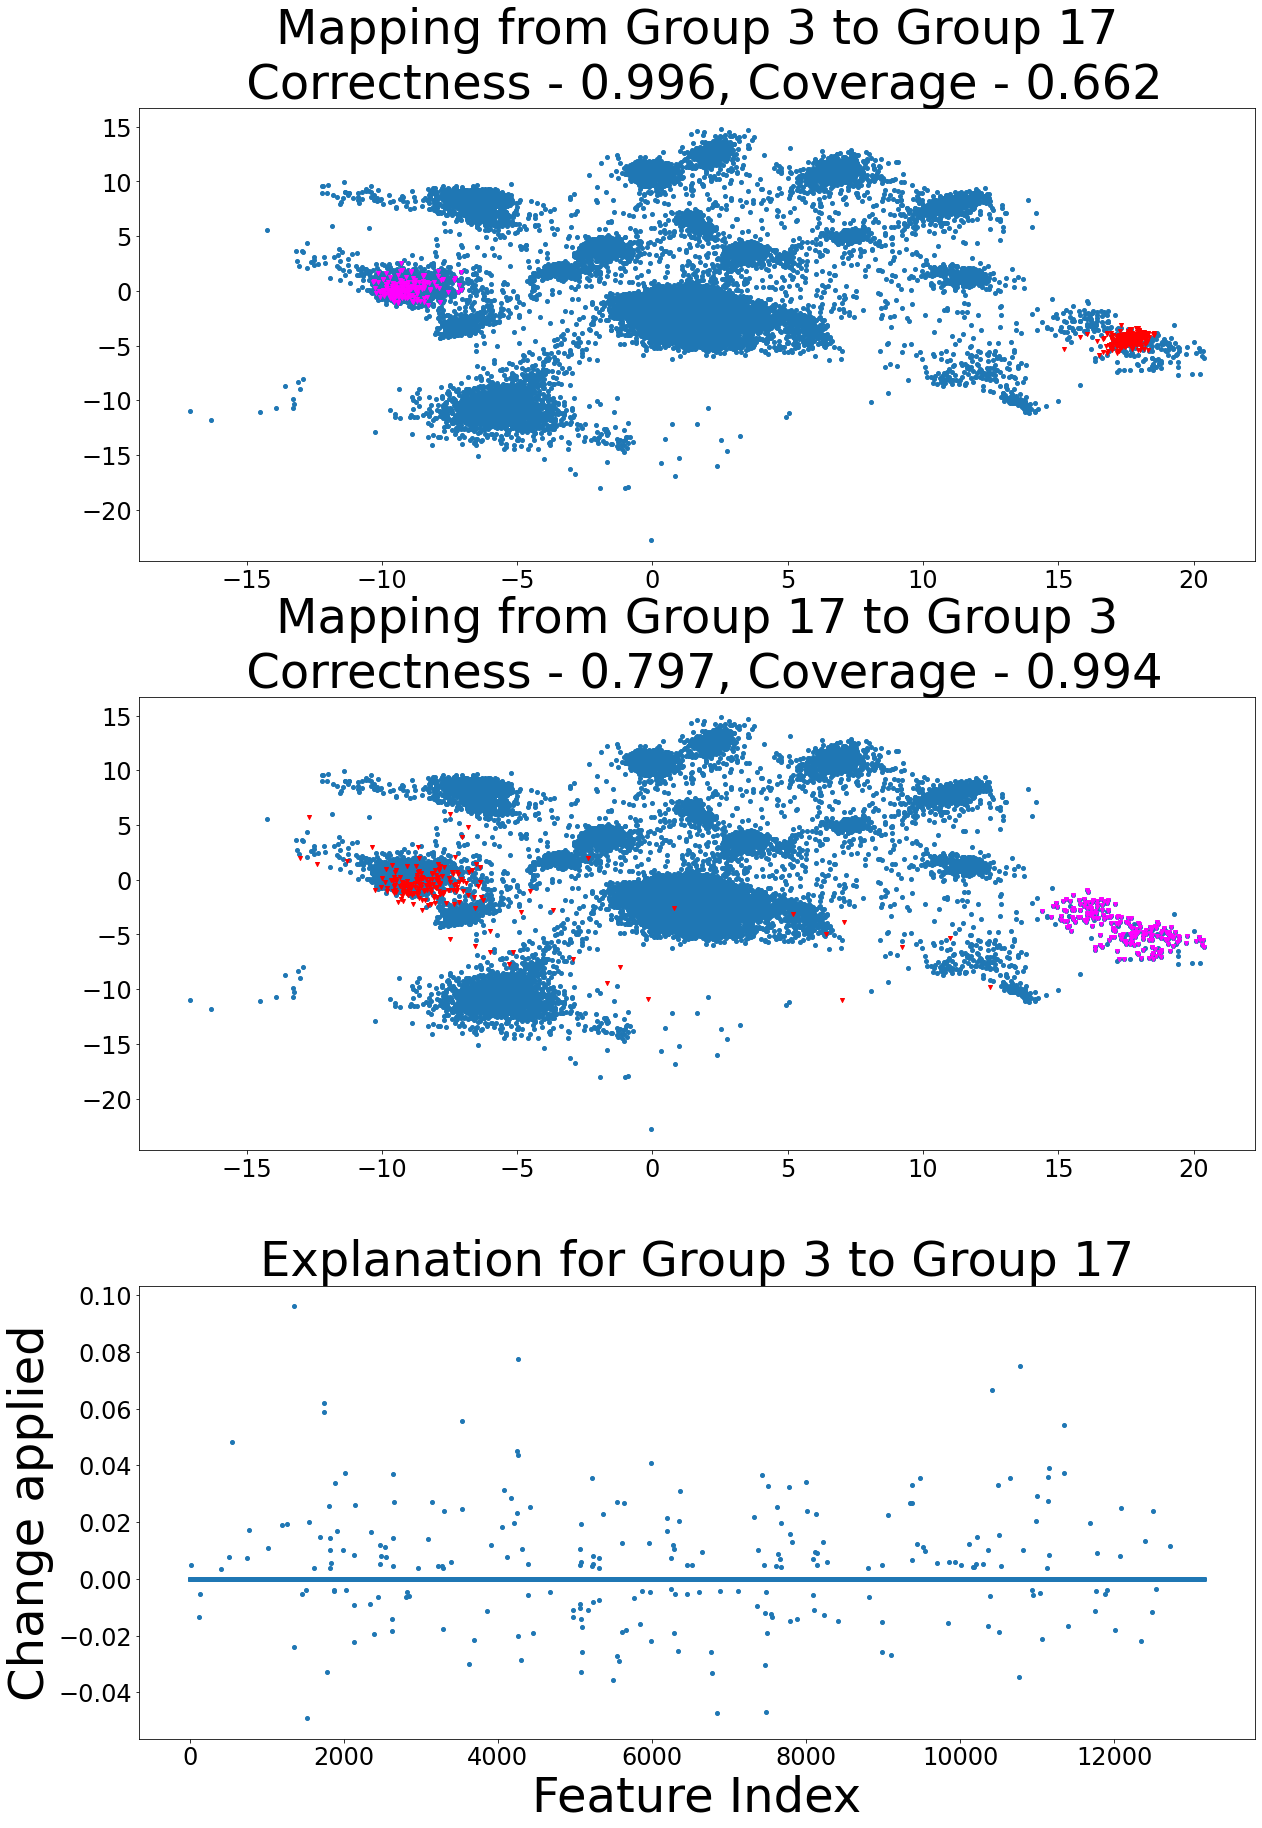

INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


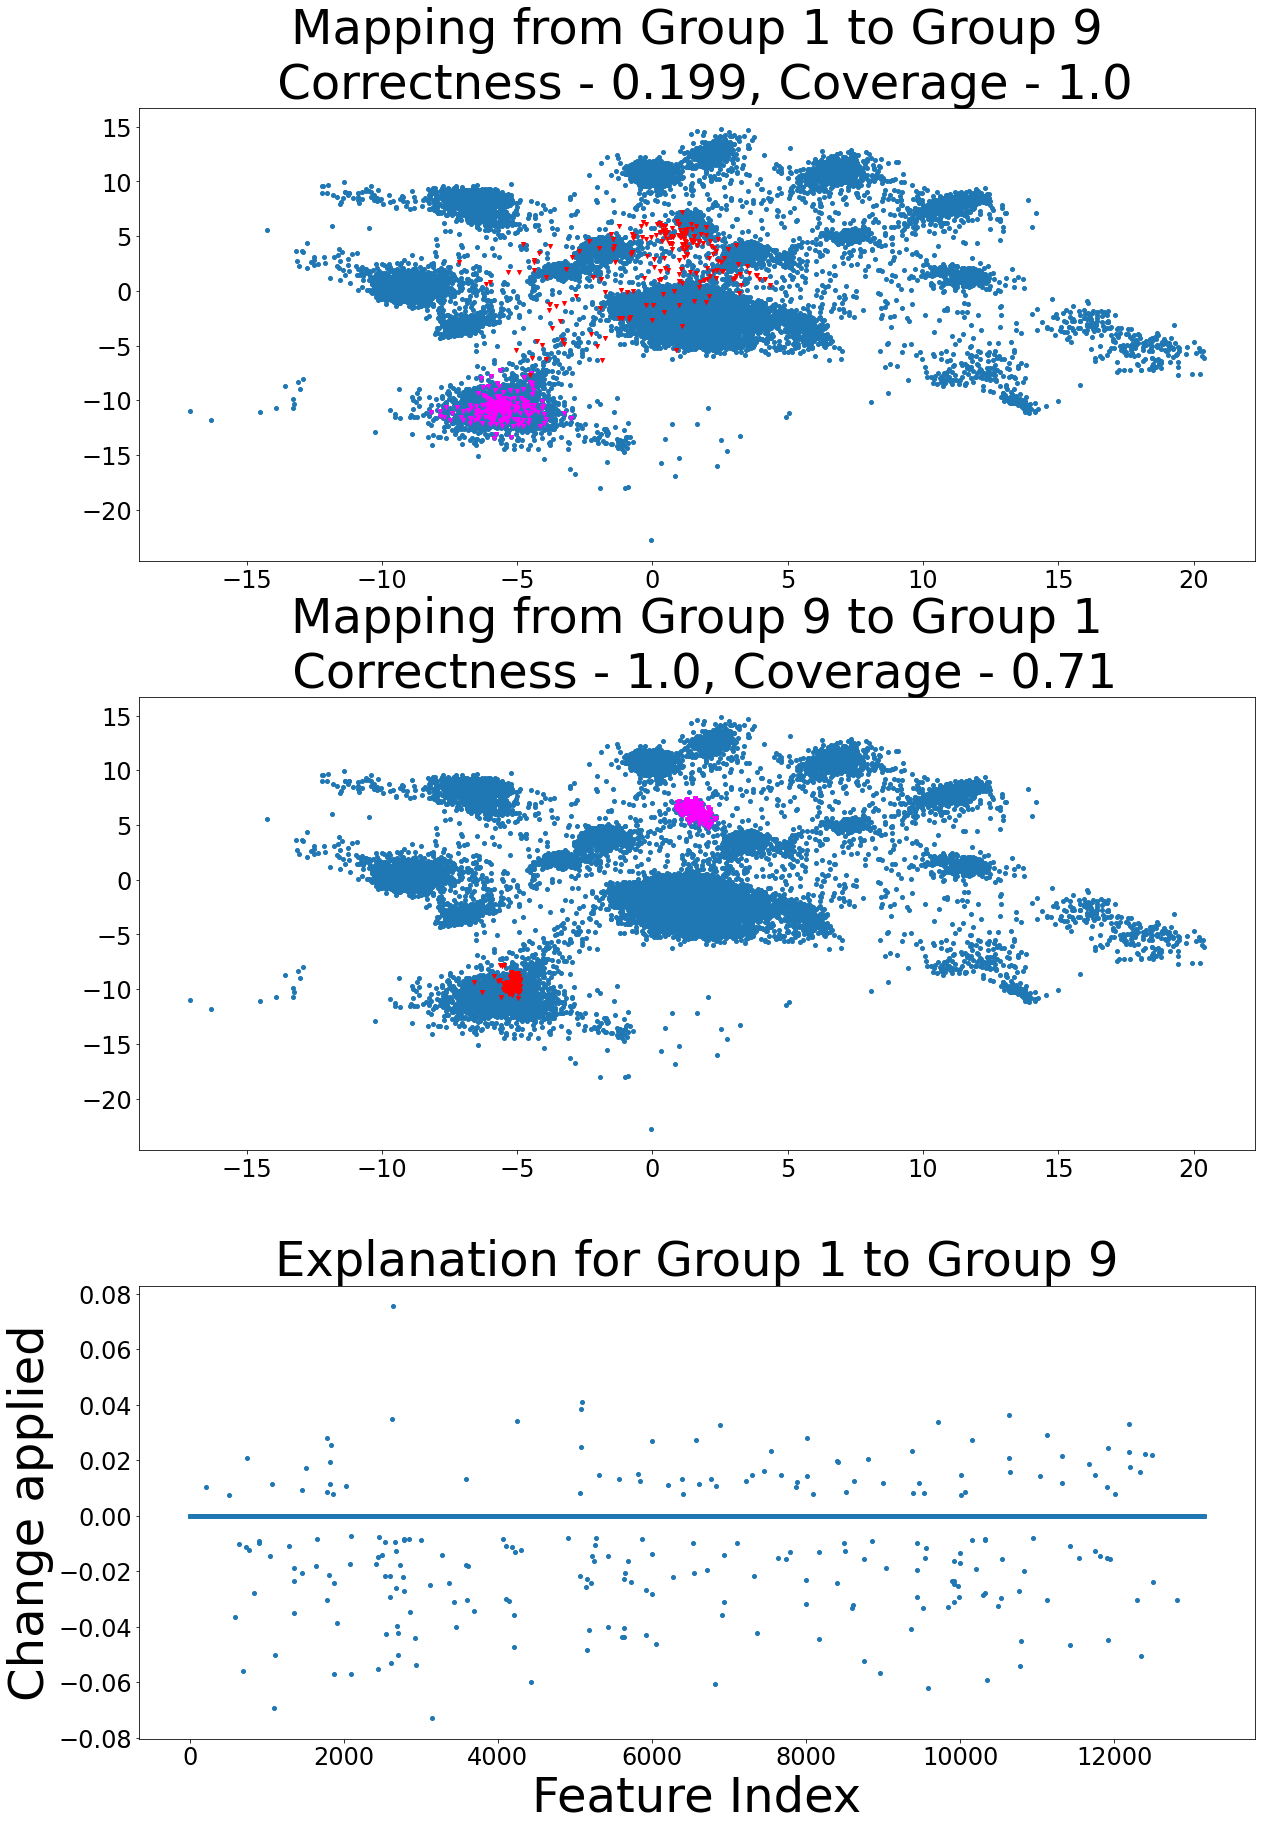

In [7]:
# Evaluate our explanations

deltas = np.load("../Bipolar-K/deltas" + str(k) + ".npy")

a, b = metrics(load_model, x_full, indices, deltas, epsilon, k = k)

plot_metrics(a, b, "bipolar-metrics.png")

plot_explanation(load_model, x_full, data_rep, indices, deltas, a, b, 4, 5, k = k, name = "bipolar-close.png", num_points = 200)

plot_explanation(load_model, x_full, data_rep, indices, deltas, a, b, 3, 17, k = k, name = "bipolar-far.png", num_points = 200)

plot_explanation(load_model, x_full, data_rep, indices, deltas, a, b, 1, 9, k = k, name = "bipolar-hard.png", num_points = 200)


INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


../Code/myplot.py:105: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  ax.cax.colorbar(im)


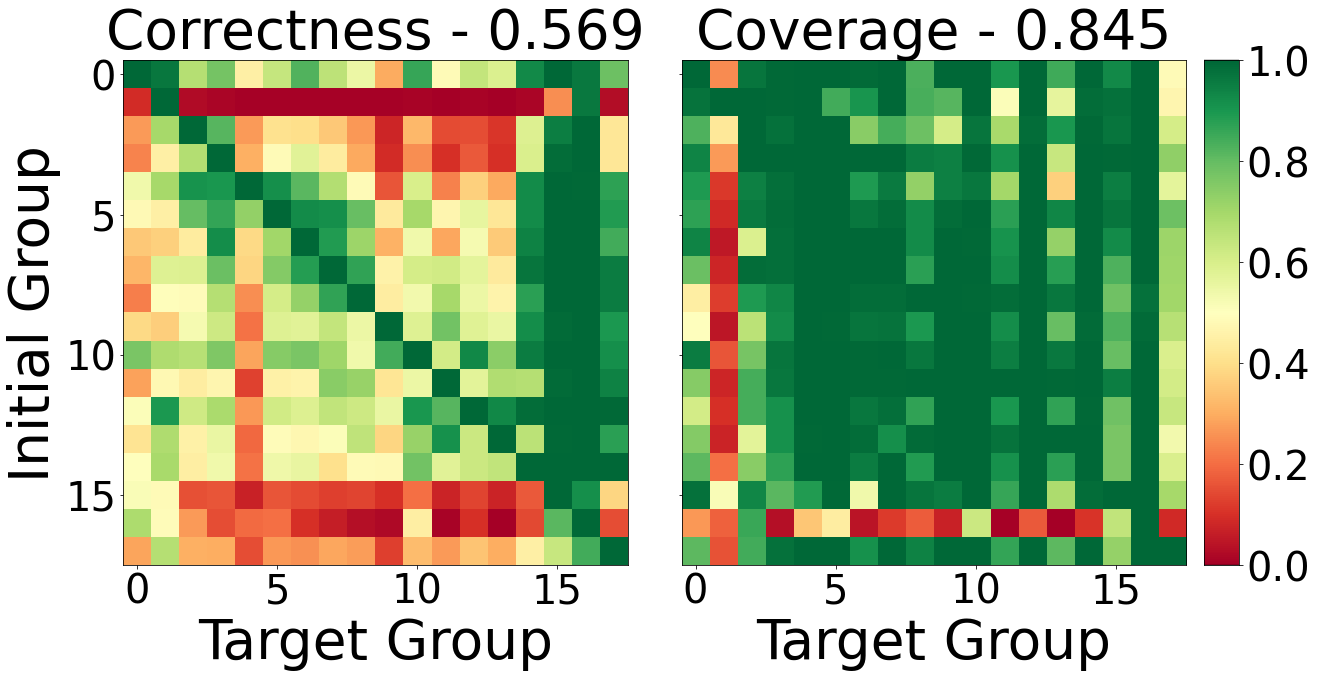

INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


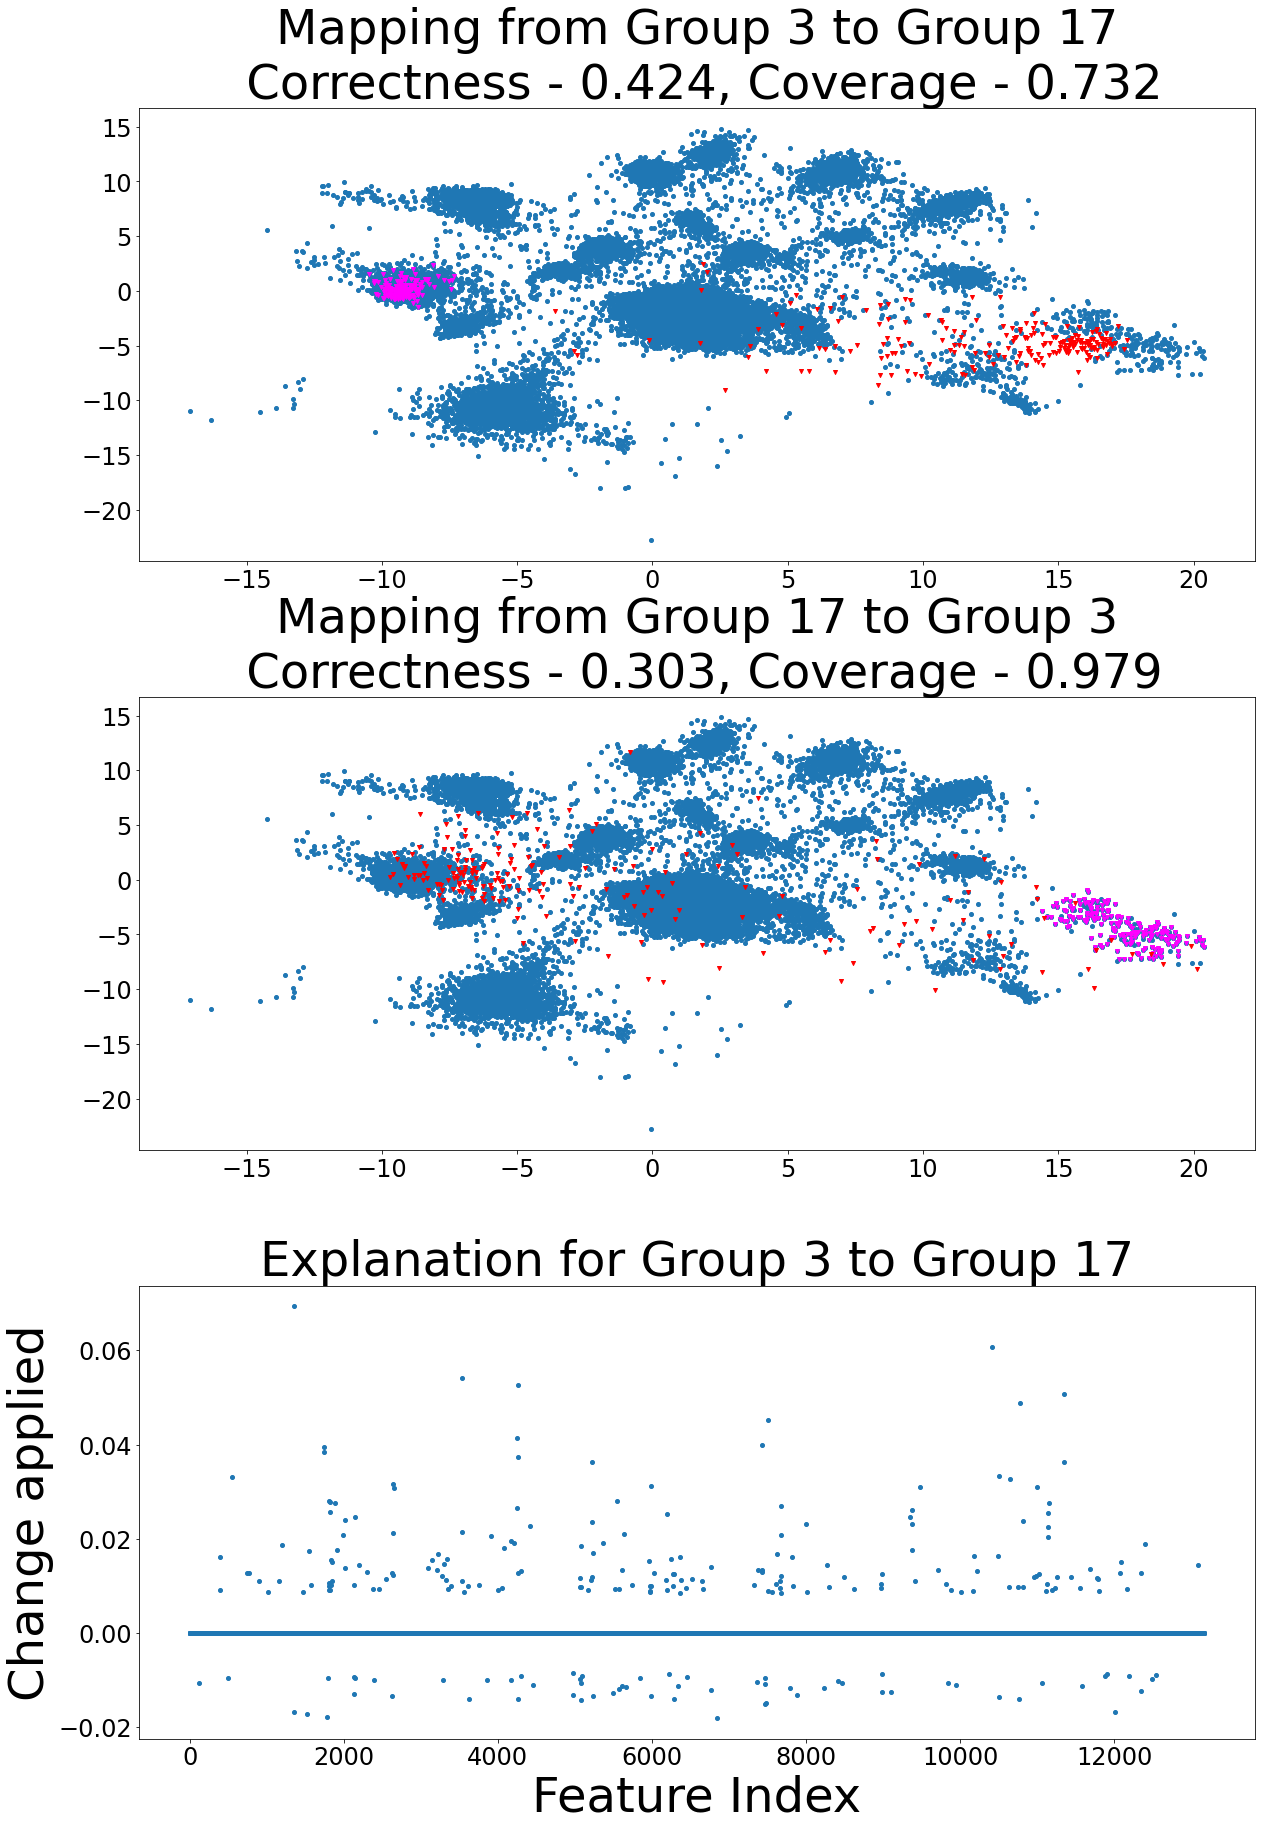

In [8]:
# Evaluate Truncated DBM 

exp_mean = np.zeros((num_clusters - 1, input_dim))
for i in range(num_clusters - 1):
    exp_mean[i, :] = means[i + 1] - means[0]
    
a, b = metrics(load_model, x_full, indices, exp_mean, epsilon, k = k)

plot_metrics(a, b, name = "bipolar-metrics-means.png")

plot_explanation(load_model, x_full, data_rep, indices, exp_mean, a, b, 3, 17, k = k, name = "bipolar-far-means-k.png", num_points = 200)



INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt
INFO:tensorflow:Restoring parameters from Model/model/perplexity_10_regularizer_0.001_batch_size_512_learning_rate_0.01_latent_dimension_2_activation_ELU_seed_1_iter_5400.ckpt


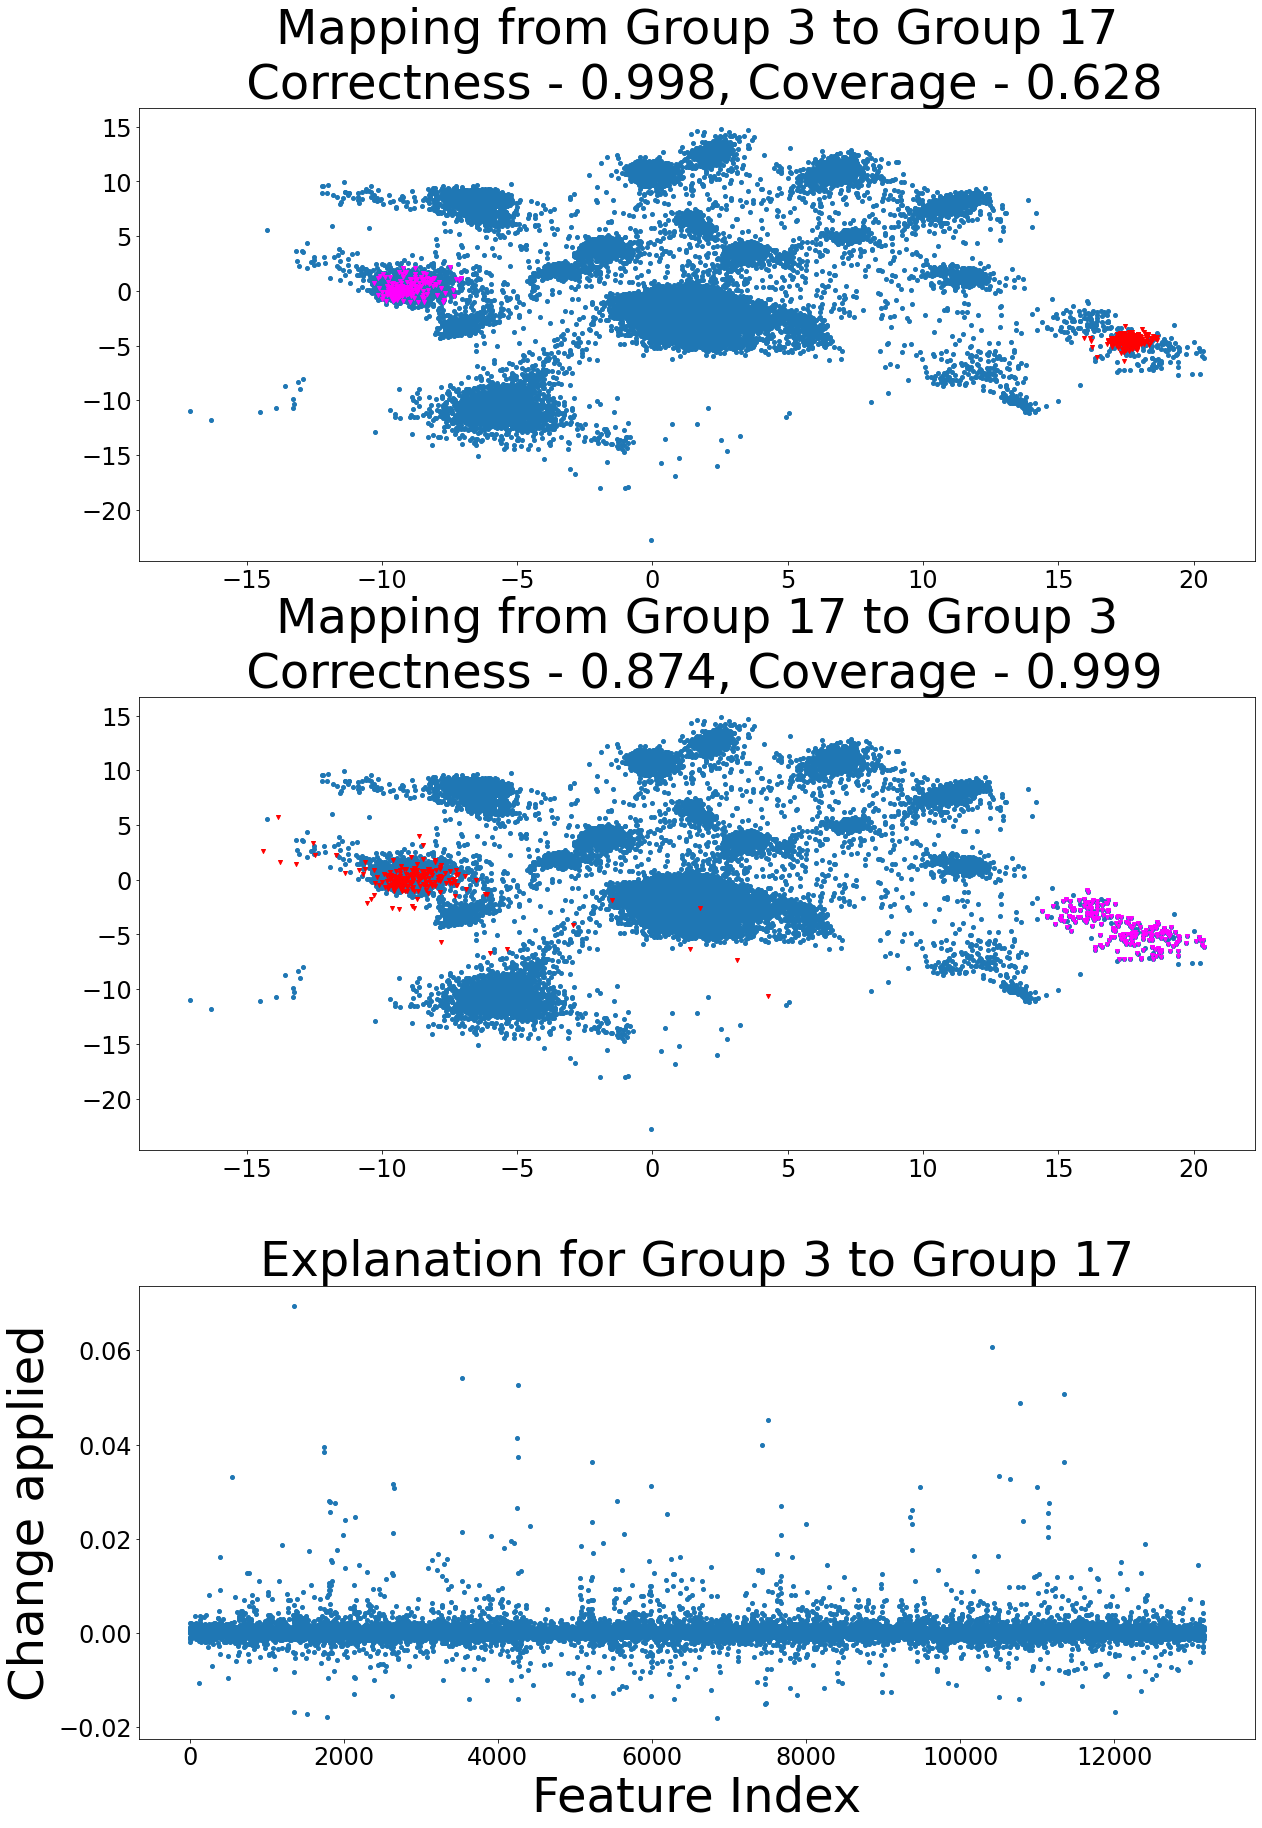

In [9]:
# Evaluate DBM
a, b = metrics(load_model, x_full, indices, exp_mean, epsilon)

plot_explanation(load_model, x_full, data_rep, indices, exp_mean, a, b, 3, 17, name = "bipolar-far-means.png", num_points = 200)
